In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dysarthria-detection/torgo_data/data.csv
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0075.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M02_Session1_0078.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M01_Session2_3_0057.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M03_Session2_0111.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M02_Session1_0066.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0371.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M03_Session2_0218.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M03_Session2_0380.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0007.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M05_Session2_0128.wav
/kaggle/input/dysarthria-detection/torgo_data/dysarthria_male/M02_Session2_0199.wav
/kaggle/input/dysar

In [3]:
directory = '../input/dysarthria-detection'
data = pd.read_csv("../input/dysarthria-detection/torgo_data/data.csv")
data['filename'] = data['filename'].apply(lambda x: os.path.join(directory,x))
data

,is_dysarthria,gender,filename
0,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
1,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
2,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
3,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
4,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
...,...,...,...
1995,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1996,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1997,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1998,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...


In [4]:
data

,is_dysarthria,gender,filename
0,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
1,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
2,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
3,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
4,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
...,...,...,...
1995,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1996,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1997,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...
1998,dysarthria,male,../input/dysarthria-detection/torgo_data/dysar...


In [5]:
data.shape

(2000, 3)

In [6]:
data.describe()

,is_dysarthria,gender,filename
count,2000,2000,2000
unique,2,2,2000
top,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
freq,1000,1000,1


In [19]:
def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filename'], sr=None)
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=52),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['Gender'] = df['gender']
    dataf['class'] = df['is_dysarthria']
    return dataf

In [20]:
dataf = feature_extraction(data)


100%|██████████| 2000/2000 [00:49<00:00, 40.59it/s]


In [21]:
dataf

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,Gender,class
0,-191.008789,73.621017,3.184799,20.472912,-1.684721,11.593274,-2.840228,10.140151,-5.058171,6.072175,...,-2.241873,0.419759,1.687507,2.708309,3.352796,2.419542,-0.107702,0.229266,female,non_dysarthria
1,-271.245300,79.915596,2.773101,20.493851,-3.536856,17.838865,6.517058,13.832056,-0.352400,13.498947,...,-2.150538,-0.000243,1.660723,3.486539,4.156585,0.317660,-2.774469,-3.873315,female,non_dysarthria
2,-270.576904,77.244087,1.497219,22.059746,-6.765018,20.577847,4.576117,15.214016,0.240988,13.884056,...,-2.367970,0.267922,1.086877,3.868811,3.990895,1.336146,-2.126446,-2.472744,female,non_dysarthria
3,-171.391724,79.037689,-10.014421,12.387104,-8.374492,14.631797,-2.644142,9.358830,-1.412721,5.326795,...,-1.705845,0.405820,0.414870,1.106096,1.161450,1.758856,-1.114597,0.648659,female,non_dysarthria
4,-249.714325,71.885529,6.370342,23.944828,1.590188,17.456963,1.798949,15.239297,-2.658756,9.321095,...,-2.053849,0.883046,2.558956,3.086031,2.557517,0.100414,-1.884825,-3.378725,female,non_dysarthria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-275.961212,98.995476,5.534322,19.825233,2.335013,11.727532,0.104214,2.066552,-5.028292,1.276421,...,3.734097,3.176555,5.293406,4.738153,2.992092,-0.225495,-0.516952,-0.230324,male,dysarthria
1995,-440.796539,105.897903,16.499884,-8.677260,-6.250260,-0.082563,-1.883537,9.250726,-2.231059,2.415078,...,1.556252,0.508411,1.623139,1.573699,1.724327,0.497510,0.408184,0.924105,male,dysarthria
1996,-351.093201,106.106285,5.644386,23.746429,5.548175,10.331473,9.864366,6.892976,3.328618,3.816465,...,2.504129,5.713871,5.356977,3.873731,2.981062,0.169570,-1.037743,-1.328817,male,dysarthria
1997,-275.477966,95.353088,3.805763,26.943626,-5.149317,7.135889,6.997577,1.854788,-6.681962,-3.057718,...,3.646570,4.459582,3.252299,2.983470,2.781819,-0.377422,-2.250285,0.059298,male,dysarthria


In [22]:
dataf.loc[dataf['class']=='non_dysarthria','class'] = 0.0
dataf.loc[dataf['class']=='dysarthria','class'] = 1.0
dataf['class'] = dataf['class'].astype(float)

In [23]:
dataf.loc[dataf['Gender']=='female','Gender'] = 0.0
dataf.loc[dataf['Gender']=='male','Gender'] = 1.0
dataf['Gender'] = dataf['Gender'].astype(float)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score 


# Assuming you've already imported necessary libraries and defined the feature_extraction function

dataf.columns = dataf.columns.astype(str)


# Split the data into features (X) and target variable (y)
X = dataf.drop('class', axis=1)  # Features
y = dataf['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(random_state=42, penalty=None)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 92.25%


In [28]:
# After fitting the model with the training data
# Predict on training data
y_train_pred = model.predict(X_train_scaled)

# Predict on testing data
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy on training data
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {training_accuracy}')

# Calculate accuracy on testing data (already in your code)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {testing_accuracy}')

Training Accuracy: 0.9093183239524703
Testing Accuracy: 0.8975


In [29]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Cross-validation Accuracy Scores: [0.9225     0.905      0.925      0.9        0.91478697]
Mean CV Accuracy: 91.35%


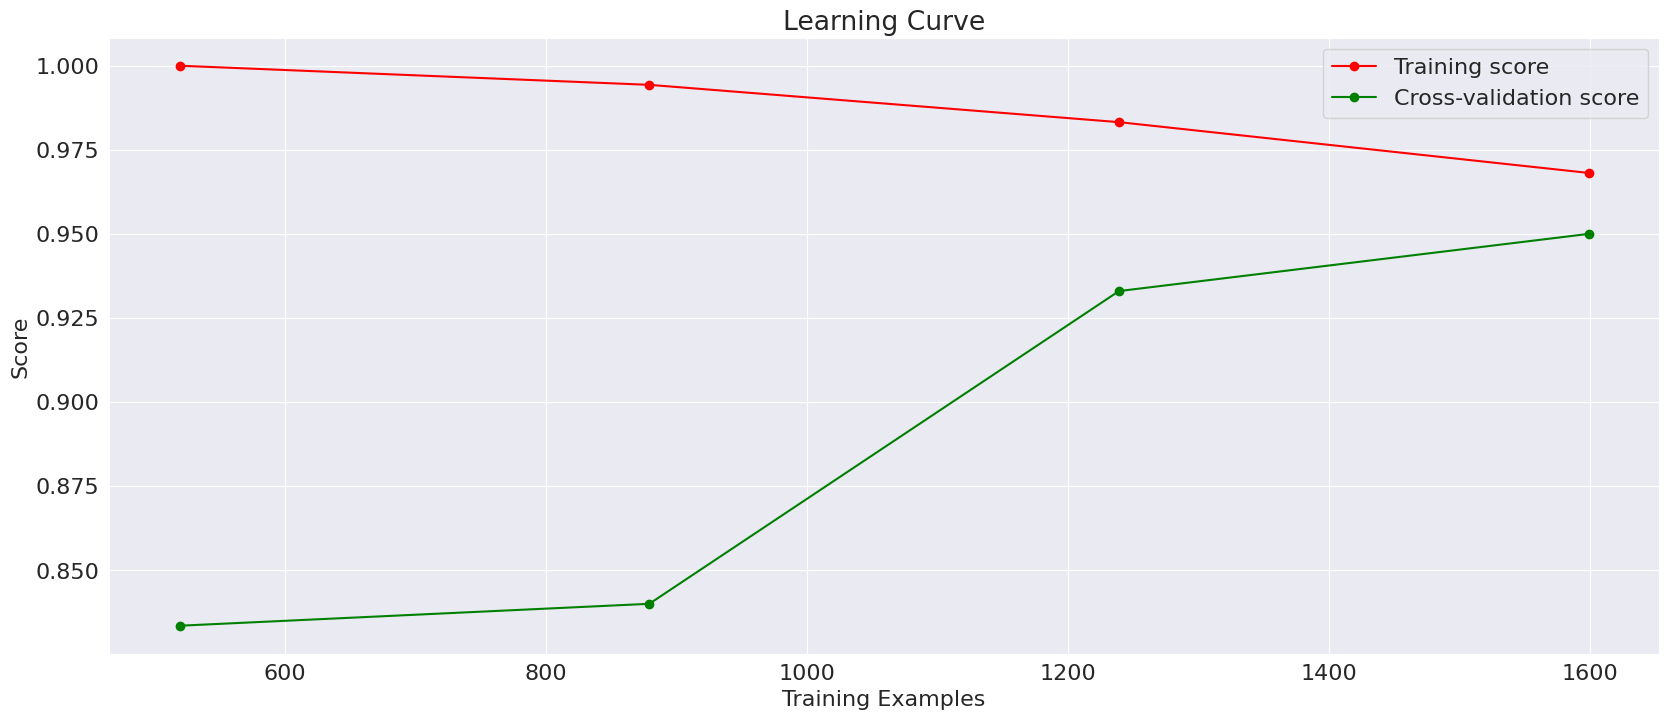

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=kf, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [16]:

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Plot the classification report using a heatmap
report_dict = classification_report(y_test, y_pred, output_dict=True)


              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       202
         1.0       0.95      0.94      0.95       198

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



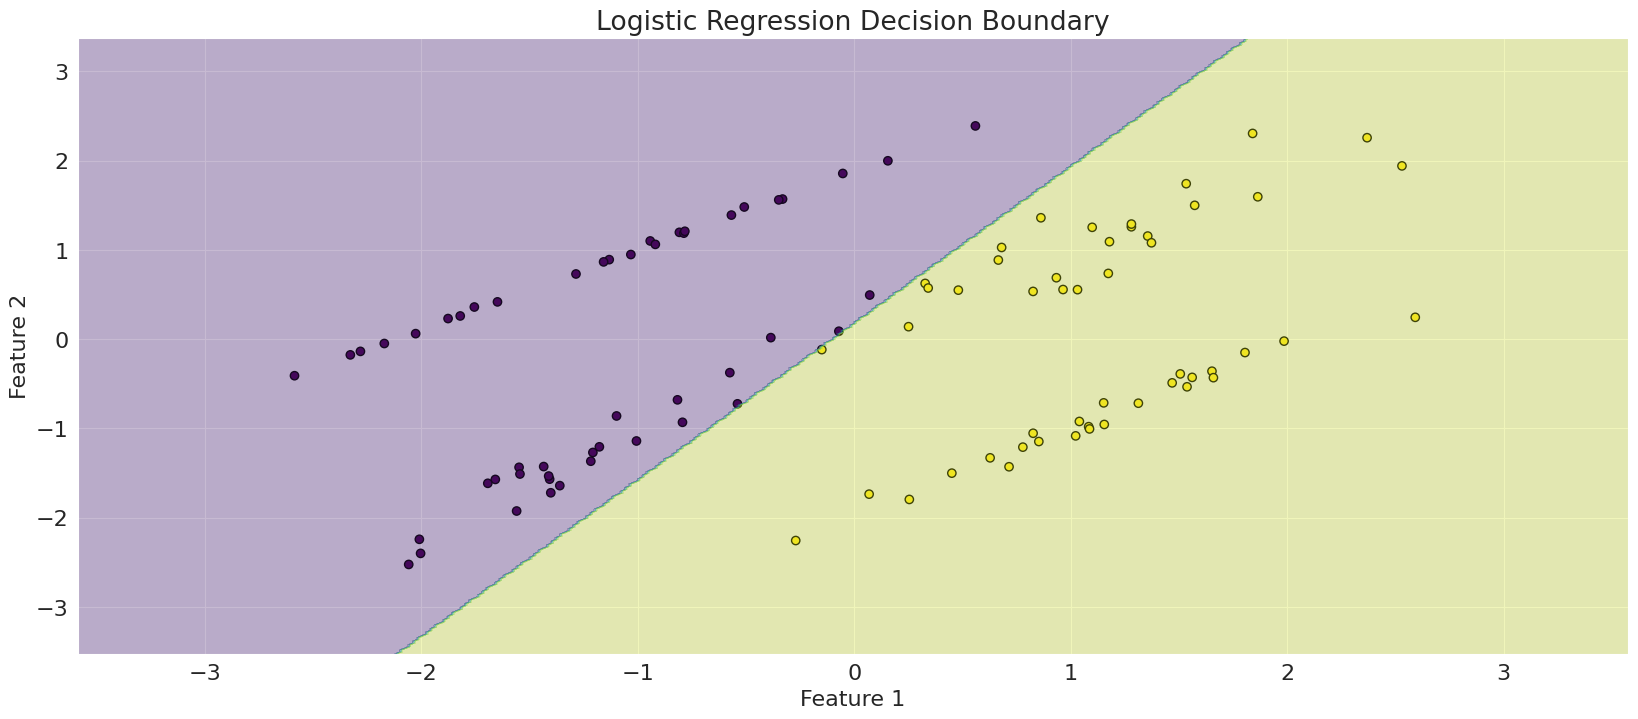

In [26]:
from sklearn.datasets import make_classification
# Generate some example data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42, penalty=None)
model.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')

# Create a grid of points
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Classify each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set plot labels
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()


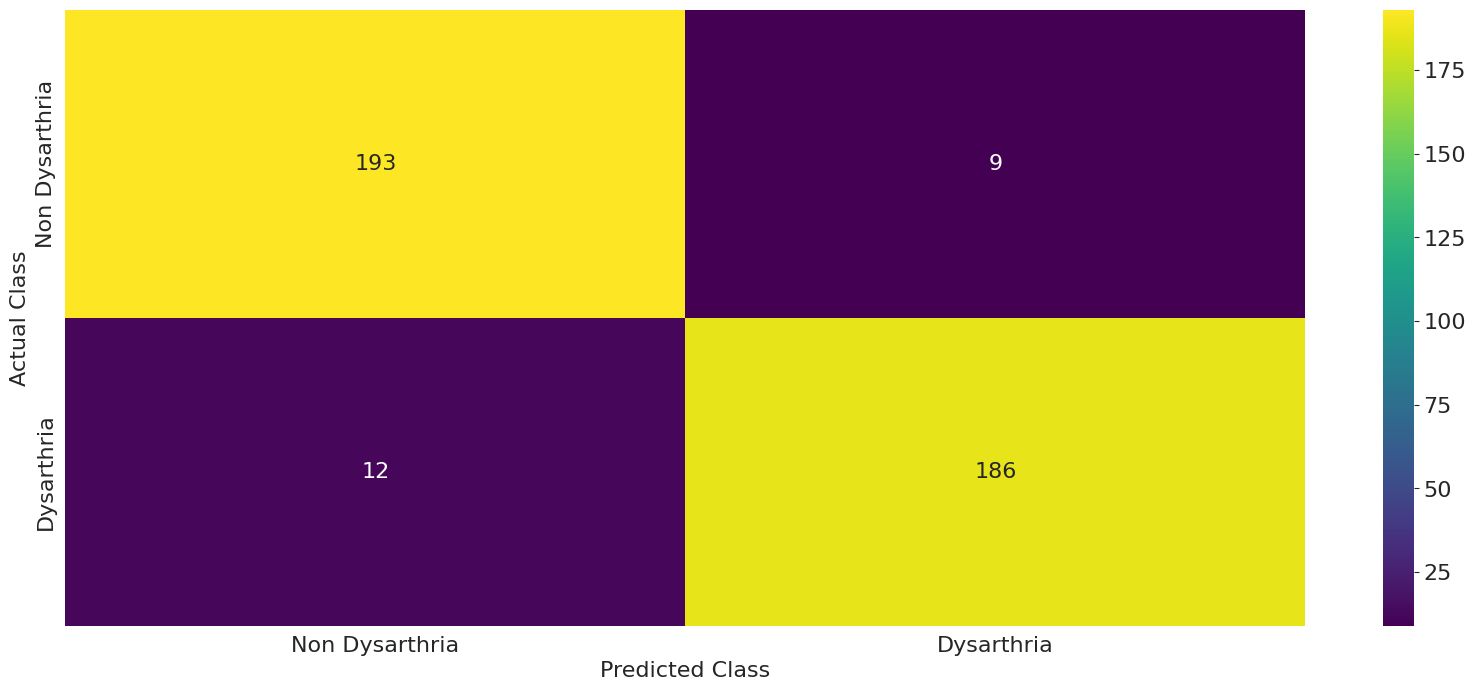

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

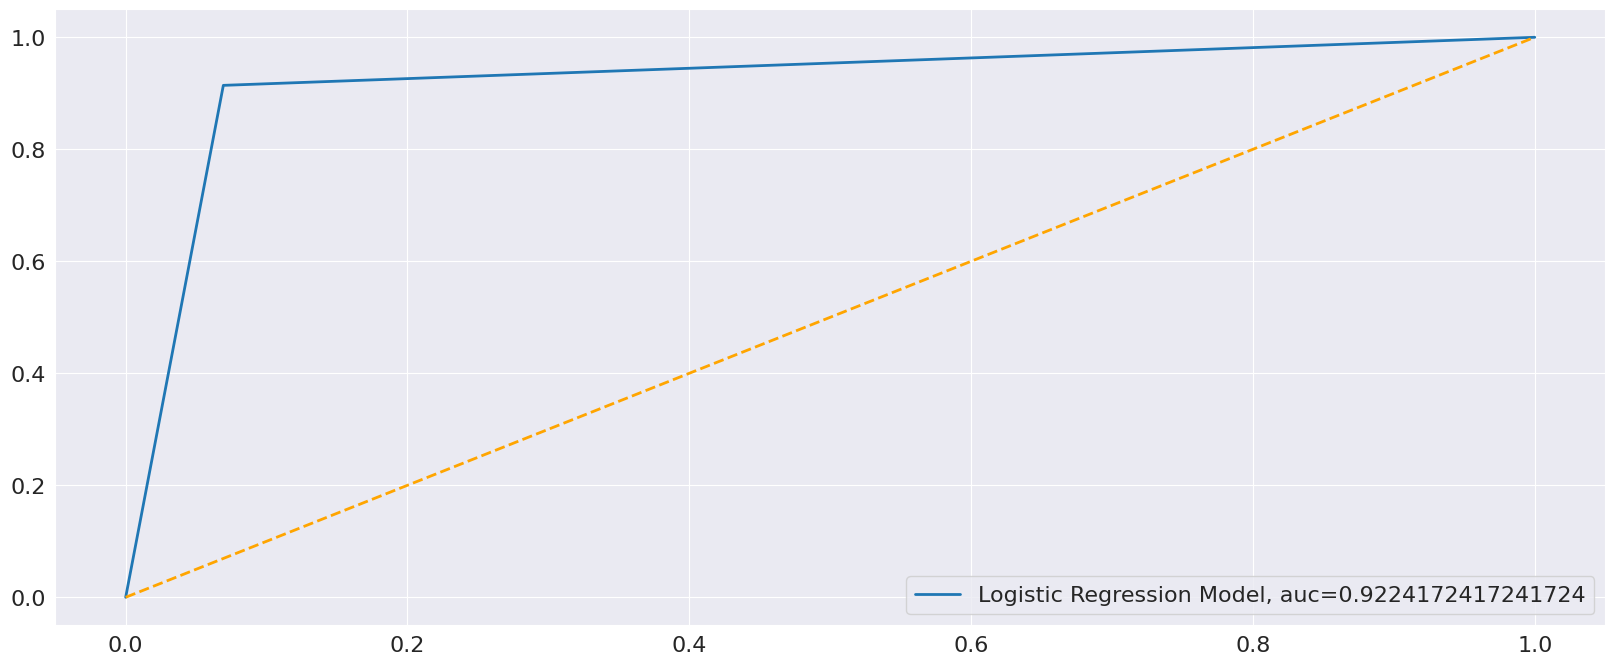

In [30]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Logistic Regression Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [ ]:
X_line.reshape(-1, 1)

In [ ]:
# Assuming X is a 2D array with one feature
X = np.random.rand(100, 1)
y = np.random.randint(0, 2, size=100)


# Generate a range of values for the X axis
X_line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Compute probabilities for the decision boundary
probs = model.predict_proba(X_line)[:, 1]

# Plot the logistic regression decision boundary (sigmoid)
plt.plot(X_line, probs, label="Logistic Regression", color="red", linewidth=2)
plt.scatter(X, y, label="Data")
plt.xlabel("Feature")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [ ]:

# Generate data with two features
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, size=100)


# Generate a meshgrid for visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA to perform well)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce data to two dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the reduced data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the logistic regression model on the reduced data
model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title('Decision boundary')

# Plotting the decision boundary
plot_decision_boundaries(X_train_pca, y_train, model_pca)
plt.show()